In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn
rcParams['figure.figsize'] = 20, 12


# Online Resources: 
 - http://philipperemy.github.io/anomaly-detection/
 - http://amunategui.github.io/anomaly-detection-h2o/

# Import H20 as cluster manager:

In [2]:
import h2o
    
# Start H2O on your local machine
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 30 mins
H2O cluster version:,3.10.4.7
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_albertomariopirovano_6zbq57
H2O cluster total nodes:,1
H2O cluster free memory:,1.552 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [4]:
X_train = h2o.import_file("../common/albertom/train_test_split/X_train.csv")
X_test = h2o.import_file("../common/albertom/train_test_split/X_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
X_train = X_train.drop([0])
X_test = X_test.drop([0])
X_train = X_train[1:,:]
X_test = X_test[1:,:]

In [6]:
print X_train.shape
X_train.head()

(22851, 87)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88
22.4595,20.8067,19.9458,19.1706,18.8324,18.8322,18.8869,6.68444,6.68044,7.64719,9.63486,9.66165,8.41682,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13.3609,4.95843,5.30756,4.22016,2.51094,6.62792,6.68978,3.1436,3.10078,2.51094,6.53337,2.35485,1.81335,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
22.0583,-0.44721,2.65818,3.1203,2.12091,5.57662,3.00152,2.6624,3.13149,2.12311,5.58587,3.00592,5.92168,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14.8572,9.77487,9.79231,9.38002,9.46243,9.57475,9.6576,3.90674,3.77192,3.54951,3.54951,3.46881,5.30297,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17.5077,16.8742,16.5322,16.6438,16.713,17.0743,16.9732,5.93159,5.9597,5.6345,7.30963,0,5.6345,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16.8336,-1.13467,-2.23605,-3.12844,2.61965,2.0213,3.51043,0,0,3.64923,0,3.54951,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6.68044,5.85809,6.46419,6.39399,6.55911,6.72731,6.72424,4.26379,0,3.10078,2.99377,2.07577,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11.4234,11.4574,10.1178,8.59699,8.03473,8.09205,8.03011,3.91778,3.98962,2.46109,3.90674,3.90674,3.90674,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18.9983,18.2727,18.0726,13.584,13.2353,12.7832,12.3294,5.57278,4.45464,4.7079,4.26379,4.20841,3.84119,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12.1392,4.09009,5.40388,7.36885,6.65809,2.09858,1.68336,5.6345,6.68044,2.99377,2.09858,0,4.66263,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
print X_test.shape
X_test.head()

(4033, 87)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88
9.63486,7.65907,8.05178,8.11475,8.14647,8.08156,8.1647,4.4721,3.10078,2.87851,0,3.10078,2.7532,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17.1773,17.4882,10.7152,8.50277,8.34894,5.37204,0,0,3.90674,3.23542,3.10078,0,10.3025,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13.3609,13.1594,13.1019,12.024,12.0861,12.1361,11.9403,5.63137,4.20841,4.4721,4.20841,4.4721,3.54951,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16.8336,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16.4754,2.32214,0,3.6803,2.38143,3.98899,3.48034,0,3.6803,2.38143,3.98899,3.48034,3.88118,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9.63486,7.55273,7.73539,0,0,0,0,3.56912,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
20.5244,10.3553,10.3257,10.5841,10.1485,10.3292,10.5031,4.4721,4.7079,4.20841,4.20841,4.20841,3.90674,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19.2697,18.4123,18.2685,18.8074,18.9006,18.9902,19.1319,0,8.68852,6.32816,6.32816,6.44989,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14.8572,14.7441,14.7696,13.5347,13.329,13.3739,13.3281,6.19121,0,4.4721,4.4721,4.52125,4.4721,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9.63486,4.17219,6.97378,8.60263,9.4502,8.86222,6.85064,6.97418,6.89692,6.45061,4.6392,6.85086,6.44607,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [21]:
from matplotlib import cm

def plot_bidimensional(model, test, recon_error, layer, title):

    bidimensional_data = model.deepfeatures(test, layer).cbind(recon_error).as_data_frame()

    cmap = cm.get_cmap('Spectral')

    fig, ax = plt.subplots()
    bidimensional_data.plot(kind='scatter', 
                            x='DF.L{}.C1'.format(layer+1), 
                            y='DF.L{}.C2'.format(layer+1), 
                            s = 50,
                            c = 'Reconstruction.MSE',
                            title = title,
                            ax = ax,
                            colormap=cmap)
    layer_column = 'DF.L{}.C'.format(layer + 1)
    columns = [layer_column + '1', layer_column + '2']
    for k, v in bidimensional_data[columns].iterrows():
        ax.annotate(k, v, size=5, verticalalignment='bottom', horizontalalignment='left')
    fig.canvas.draw()


In [22]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
seed = 13

model = H2OAutoEncoderEstimator(
    activation="Tanh",
    hidden=[50, 20, 2, 20, 50],
    epochs=100,
    #sparse=True,
    #l1=1e-5,
    seed=seed,
    reproducible=True)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%


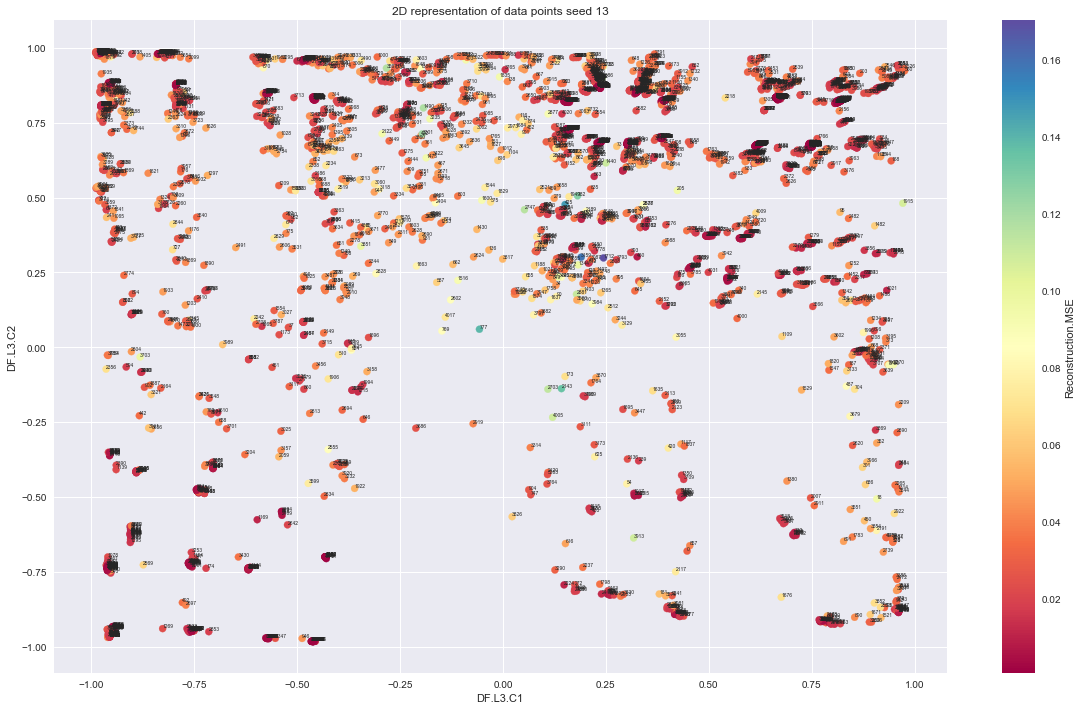

In [23]:
model.train(
    x=X_train.names,
    training_frame=X_train
)

recon_error = model.anomaly(X_test)
plot_bidimensional(model, X_test, recon_error, 2, "2D representation of data points seed {}".format(seed))

In [24]:
model

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1495181882686_17


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0186476514948
RMSE: 0.136556404078
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2017-05-19 13:37:48,0.541 sec,"0,00000 obs/sec",0.0,0,0.0,0.2669909,0.0712841
,2017-05-19 13:37:55,7.409 sec,3485 obs/sec,1.0,1,22851.0,0.1923022,0.0369801
,2017-05-19 13:38:02,14.733 sec,3364 obs/sec,2.0,2,45702.0,0.1842176,0.0339361
,2017-05-19 13:38:11,23.021 sec,3180 obs/sec,3.0,3,68553.0,0.1777007,0.0315775
,2017-05-19 13:38:18,30.761 sec,3161 obs/sec,4.0,4,91404.0,0.1740318,0.0302871
---,---,---,---,---,---,---,---,---
,2017-05-19 13:47:40,9 min 52.220 sec,3685 obs/sec,91.0,91,2079441.0,0.1365564,0.0186477
,2017-05-19 13:47:46,9 min 58.846 sec,3684 obs/sec,92.0,92,2102292.0,0.1374823,0.0189014
,2017-05-19 13:47:53,10 min 5.422 sec,3684 obs/sec,93.0,93,2125143.0,0.1369695,0.0187607
,2017-05-19 13:48:00,10 min 12.060 sec,3683 obs/sec,94.0,94,2147994.0,0.1368117,0.0187174



See the whole table with table.as_data_frame()


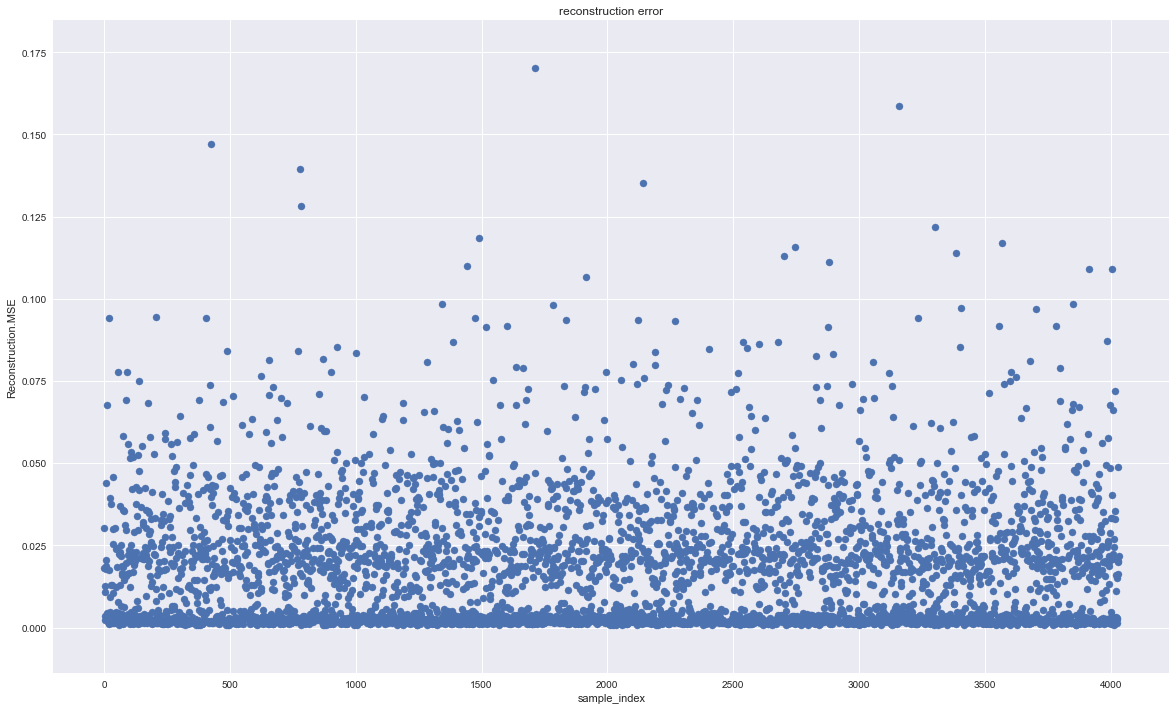

In [25]:
plt.figure()
df=recon_error.as_data_frame(True)
df["sample_index"]=df.index
df.plot(kind="scatter", x="sample_index", y="Reconstruction.MSE", 
        title = "reconstruction error", s = 50)

In [26]:
len(recon_error)

4033

deepfeatures progress: |██████████████████████████████████████████████████| 100%


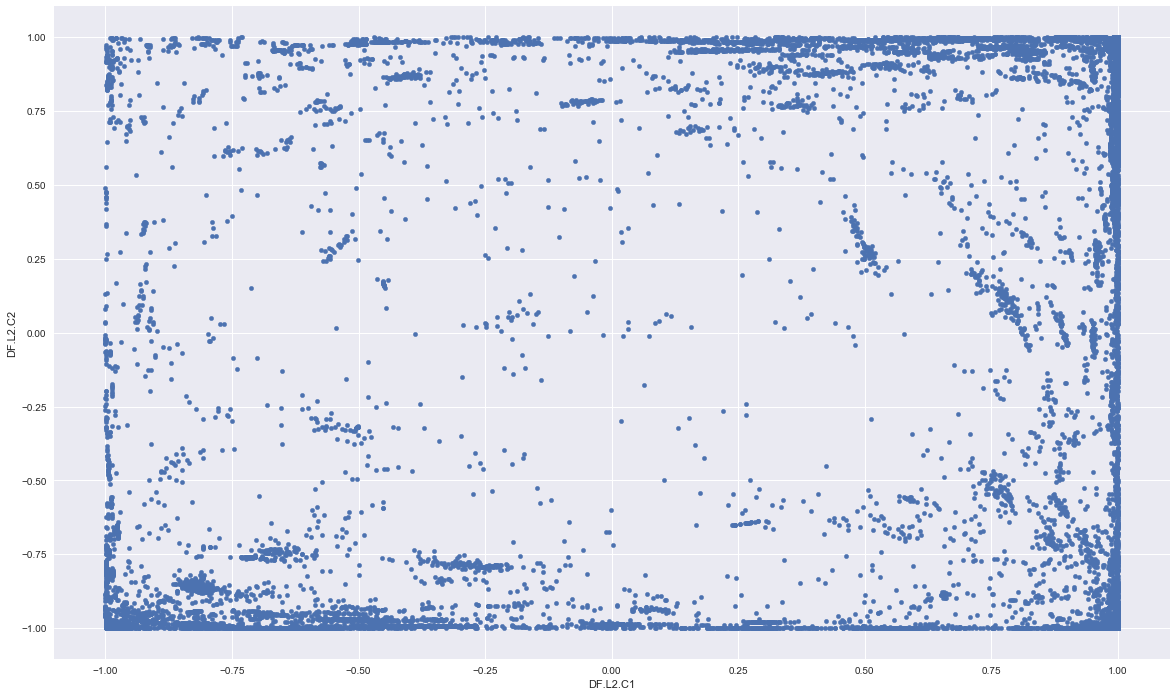

In [27]:
model.deepfeatures(X_train, 1).as_data_frame().plot(kind='scatter', x='DF.L2.C1', y='DF.L2.C2')

Anomaly detection using compressed representation

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%


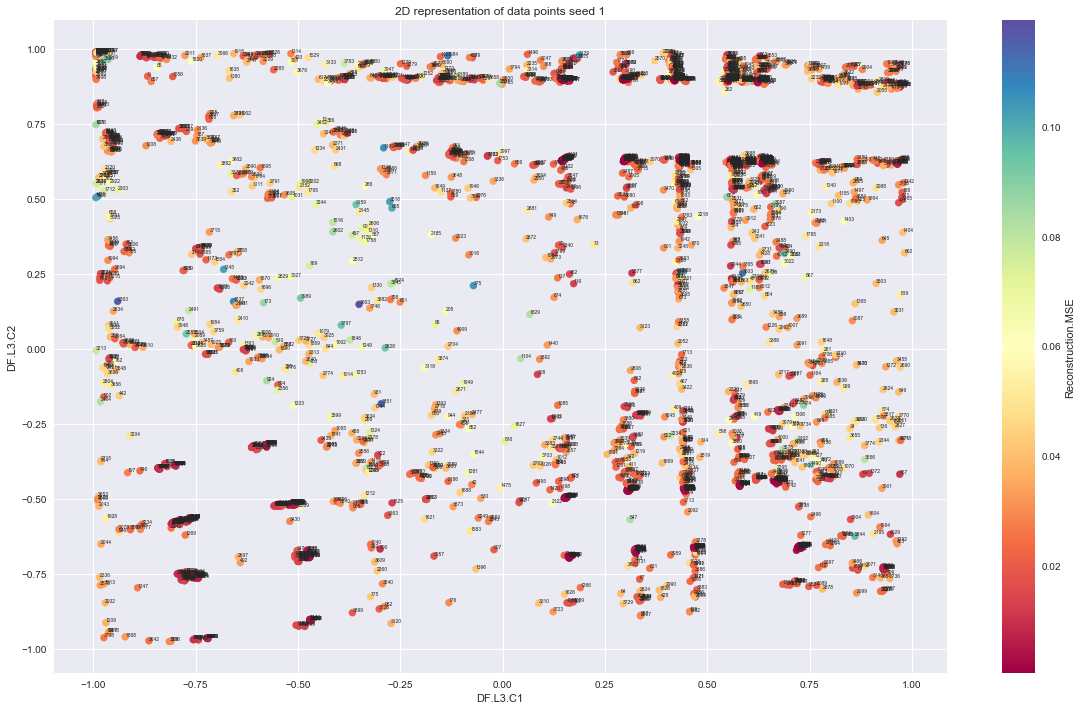

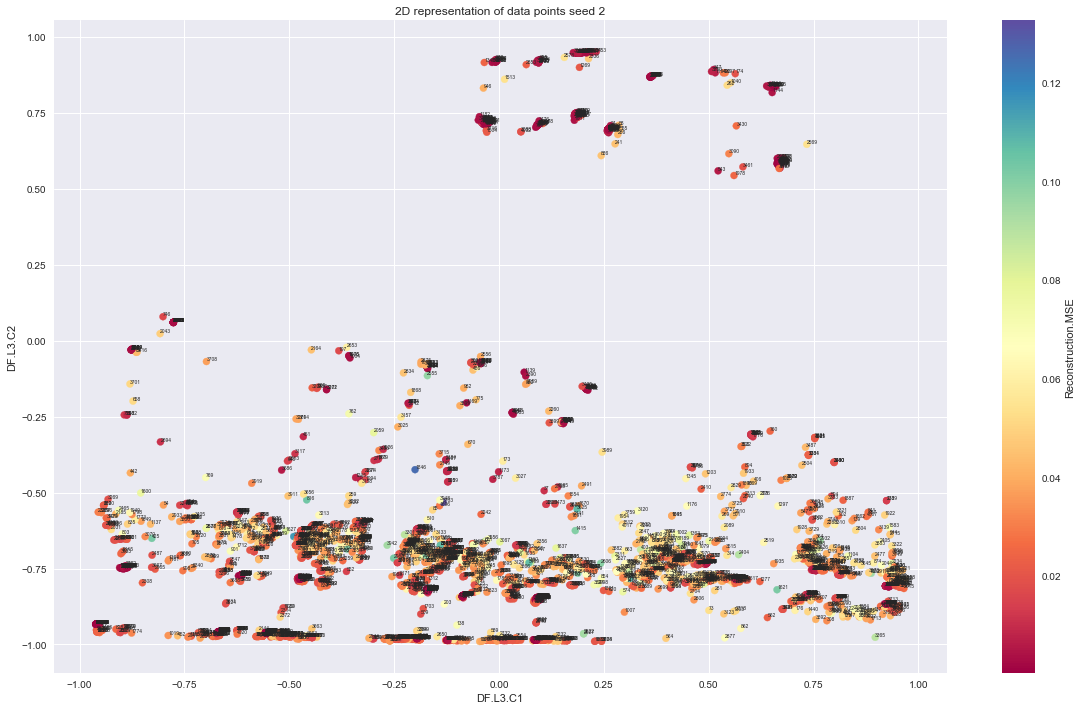

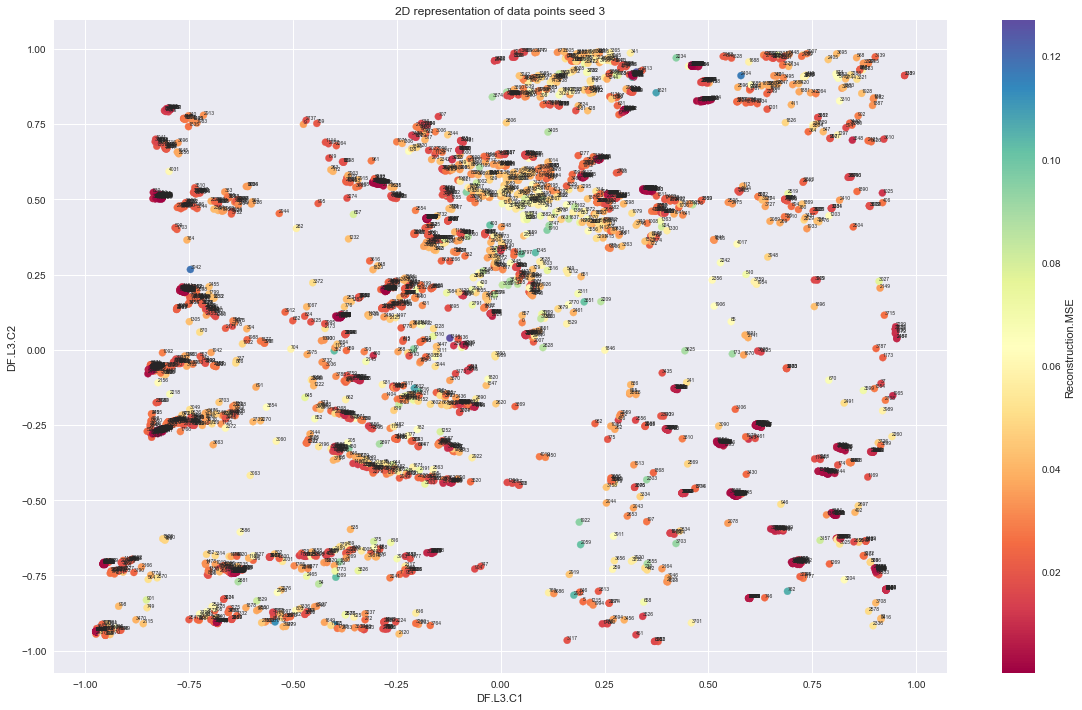

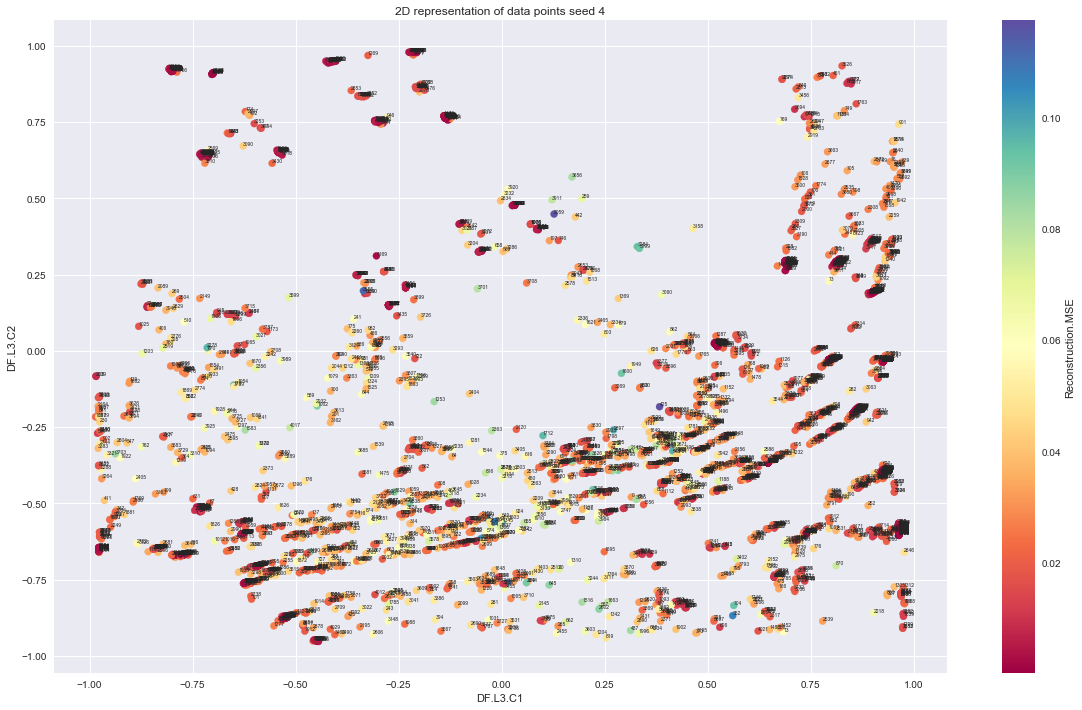

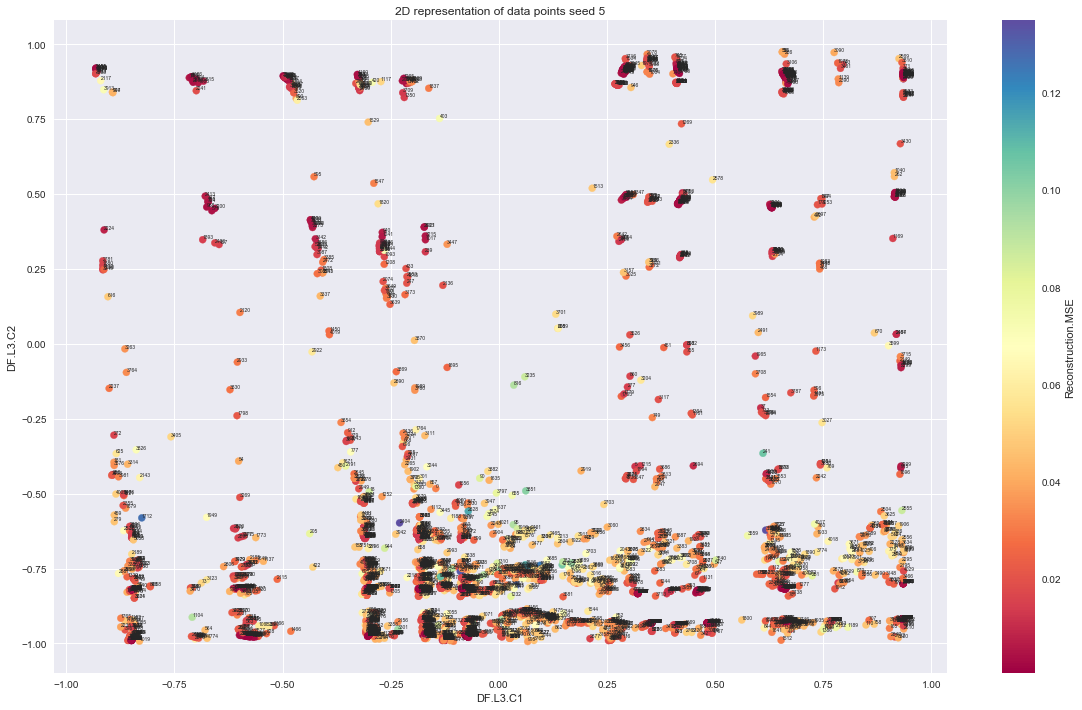

In [28]:
for seed in range(1, 6):
    model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[50,20, 2, 20, 50],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=seed,
        reproducible=True)
    model.train(
    x=X_train.names,
    training_frame=X_train)

    recon_error = model.anomaly(X_test)
    plot_bidimensional(model, X_test, recon_error, 2, "2D representation of data points seed {}".format(seed))
    # compute average and variance of the 2 dimensions


In [ ]:
model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[50,20, 2, 20, 50],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=1,
        reproducible=True)
model.train(
    x=X_train.names,
    training_frame=X_train
)

recon_error = model.anomaly(X_test)
bidimensional_data = model.deepfeatures(X_test, 2).cbind(recon_error).as_data_frame()
bidimensional_data

deeplearning Model Build progress: |███████████████████████████████